In [ ]:
import requests
import json
#import logging
#import http.client
import pandas as pd
import xlwings as xw
from time import sleep
from datetime import datetime,time,timedelta
import os
#import property as p
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSplin



pd.set_option("display.width",1500)
pd.set_option("display.max_columns",75)
pd.set_option("display.max_rows",150)


In [4]:
def readJson(filename):
    with open(filename,"r") as files:
        data = json.load(files)
    #print(data)
    return data


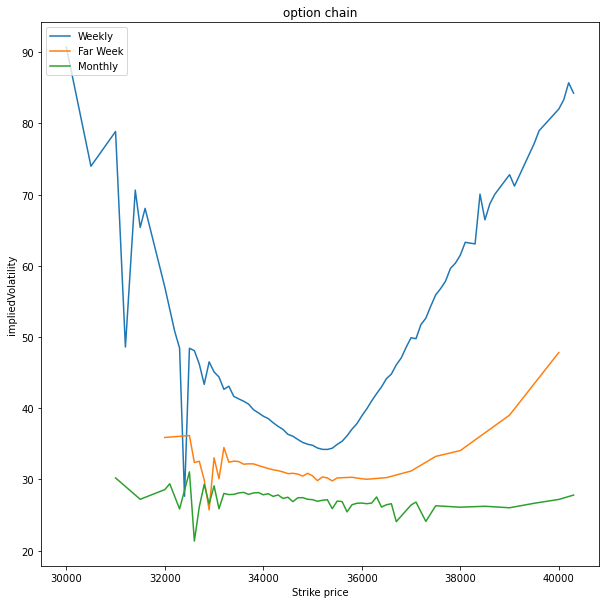

In [138]:
df_list = readJson("oi_data_records_300321.json")
df = pd.DataFrame()
for item in df_list:
    df = pd.concat([df,pd.DataFrame(item)])
#df.head()
df1 = df[df['expiryDate'] == '01-Apr-2021']
df2 = df[df['expiryDate'] == '08-Apr-2021']
df3 = df[df['expiryDate'] == '29-Apr-2021']
df1 = df1[(df1['lastPrice']  !=0) & (df1['type']=="CE")  & (df1['impliedVolatility']  !=0) & (df1['Time']== df1['Time'].max())]
df2 = df2[(df2['lastPrice']  !=0) & (df2['type']=="CE")  & (df2['impliedVolatility']  !=0) & (df2['Time']== df2['Time'].max())]
df3 = df3[(df3['lastPrice']  !=0) & (df3['type']=="CE")& (df3['impliedVolatility']  !=0)& (df3['Time']== df3['Time'].max())]
#print(df1[['strikePrice','lastPrice','type','impliedVolatility','Time']])
#print(df2)
X_Y_Spline = make_interp_spline(df1['strikePrice'], df1['impliedVolatility'])
X_ = np.linspace(df1['strikePrice'].min(), df1['strikePrice'].max(), 50)
Y_ = X_Y_Spline(X_)
plt.figure(figsize=(10,10))
plt.plot(df1['strikePrice'],df1['impliedVolatility'] ,label ="Weekly")
plt.plot(df2['strikePrice'],df2['impliedVolatility'] ,label ="Far Week")
#plt.plot(X_,Y_ ,label ="Weekly")
plt.plot(df3['strikePrice'],df3['impliedVolatility'] ,label ="Monthly")

plt.xlabel("Strike price")
plt.ylabel("impliedVolatility")
plt.title("option chain")
plt.legend(loc="upper left")

In [152]:
strikelist= [34000,34500 35000,35500,36000]

df1 = df1[(df1['lastPrice']  !=0) & (df1['strikePrice'].isin (strikelist.csvikelist.csvikelist.csvikelist))  & (df1['impliedVolatility']  !=0) & (df1['Time']== df1['Time'].max())]
print(df1)

SyntaxError: invalid syntax (<ipython-input-152-a0b775f3ec87>, line 1)

In [136]:
print(df1.iloc[df1['openInterest'].argsort()[-3:]][['strikePrice','lastPrice','type','impliedVolatility','Time','openInterest']])
print(df3.iloc[df3['openInterest'].argsort()[-3:]][['strikePrice','lastPrice','type','impliedVolatility','Time','openInterest']])

    strikePrice  lastPrice type  impliedVolatility   Time  openInterest
87        36000       6.50   CE              38.92  15:27         27432
77        35000      43.95   CE              34.79  15:27         32815
67        34000     325.65   CE              38.88  15:27         44771
     strikePrice  lastPrice type  impliedVolatility   Time  openInterest
66         34000    1141.35   CE              27.84  15:27          7946
86         36000     382.80   CE              26.68  15:27          8206
126        40000      23.70   CE              27.19  15:27         10264


In [137]:
group= df.groupby(['expiryDate','type']).

